In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

plt.rc('font', family='NanumBarunGothic')

# 배경 데이터

## 행정구역별 어린이 인구수

In [2]:
# 인구데이터에서 어린이 인구수만 추출
df_child = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/어린이인구.csv',usecols=[0,2])
df_child.drop(0,inplace=True)
df_child.columns = ['자치구', 'child_pop']
df_child['자치구'] = df_child['자치구'].str.split(' ').str[1]
df_child = df_child.set_index('자치구')
df_child['child_pop'] = df_child['child_pop'].str.replace(',','')
df_child = df_child.astype('int64')

df_child

,child_pop
자치구,
종로구,6515
중구,5990
용산구,12104
성동구,18357
광진구,16666
동대문구,18848
중랑구,20537
성북구,26261
강북구,12954


In [3]:
fig = px.bar(x = df_child.index, y = 'child_pop', 
             data_frame = df_child)
fig.update_layout(
    title="자치구별 어린이 인구 현황",
    xaxis_title="자치구",
    yaxis_title="어린이 인구 수")

## ** 시설 데이터 생성 (현 어린이 인구수 데이터)

In [3]:
# 시설 데이터 생성
df_facilities = df_child.copy()

# 병원

## 행정구역별 병원 수

In [4]:
df_hos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/병의원.csv')
df_hos = df_hos.iloc[:,[1]]
df_hos.columns = ['자치구']
df_hos['자치구'] = df_hos['자치구'].str.split(' ').str[1]
df_hos = df_hos.groupby('자치구').agg(h_total = ('자치구', 'count'))

df_hos

,h_total
자치구,
강남구,2953
강동구,893
강북구,477
강서구,927
관악구,723
광진구,577
구로구,582
금천구,371
노원구,771


### 참고: 병원 수 순위

In [12]:
df_hos.sort_values('h_total',ascending = False)

,h_total
자치구,
강남구,2953
서초구,1418
송파구,1289
강서구,927
강동구,893
영등포구,808
마포구,784
노원구,771
관악구,723


## ** 시설 데이터에 삽입

In [5]:
# 시설 데이터에 삽입
df_facilities.insert(1,'h_total',df_hos['h_total'])

In [6]:
df_facilities

,child_pop,h_total
자치구,,
종로구,6515,510
중구,5990,584
용산구,12104,333
성동구,18357,487
광진구,16666,577
동대문구,18848,627
중랑구,20537,568
성북구,26261,551
강북구,12954,477


## ** 상관계수

In [7]:
df_facilities.corr()

,child_pop,h_total
child_pop,1.000000,0.573376
h_total,0.573376,1.000000


<AxesSubplot:xlabel='h_total', ylabel='child_pop'>

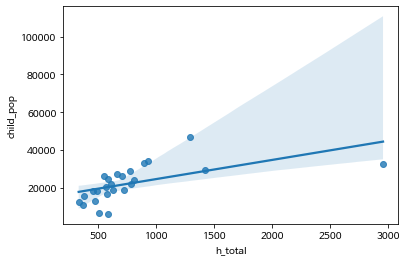

In [8]:
sns.regplot(x='h_total', y='child_pop', data=df_facilities)

# 돌봄센터

## 행정구역별 돌봄센터 수

In [13]:
df_care1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/열린육아방.csv', usecols = [1,5])
df_care2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/우리동네키움센터.csv', usecols = [1,5])
df_care3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/data/지역아동센터.csv',usecols = [1,5])

df_care = pd.concat([df_care1,df_care2,df_care3])
df_care.dropna(inplace = True)
df_care.reset_index(drop=True, inplace=True)
df_care.columns = ['시설명','자치구']

df_care = df_care.iloc[:,[1]]
df_care.columns = ['자치구']
df_care = df_care.groupby('자치구').agg(care_total = ('자치구', 'count'))

In [14]:
df_care

,care_total
자치구,
강남구,15
강동구,37
강북구,27
강서구,26
관악구,33
광진구,25
구로구,43
금천구,30
노원구,61


### 참고: 돌봄센터 수 순위

In [15]:
df_care.sort_values('care_total',ascending=False)

,care_total
자치구,
노원구,61
동작구,46
구로구,43
송파구,40
성북구,40
은평구,40
중랑구,39
영등포구,39
강동구,37


## ** 시설데이터에 삽입

In [17]:
# 시설 데이터에 삽입
df_facilities.insert(2,'care_total',df_care['care_total'])

df_facilities

,child_pop,h_total,care_total
자치구,,,
종로구,6515,510,19
중구,5990,584,13
용산구,12104,333,13
성동구,18357,487,24
광진구,16666,577,25
동대문구,18848,627,27
중랑구,20537,568,39
성북구,26261,551,40
강북구,12954,477,27


### 참고: 돌봄센터수와 어린이 인구수 관계 시각화

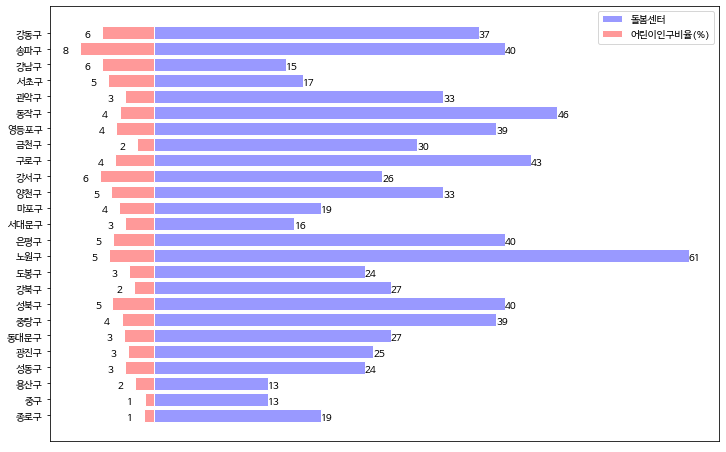

In [20]:
plt.figure(figsize = (12,8))

x = df_facilities.copy()

X = x.index
Y2 = (x['child_pop'].astype('float')*100)/x['child_pop'].sum()
Y1 = x['care_total'].astype('float')

#plt.xticks(rotation=60)
plt.barh(X, Y1, facecolor='#9999ff', edgecolor='white', label='돌봄센터')
plt.barh(X, -Y2, facecolor='#ff9999', edgecolor='white', label = '어린이인구비율(%)')

for index, value in enumerate(Y1):
      plt.text(value, index-0.3, round(value))

for index, value in enumerate(Y2):
      plt.text(-value-2, index-0.3, round(value))

plt.legend()
plt.gca().axes.xaxis.set_visible(False)
plt.show()

## ** 상관계수

In [21]:
df_facilities.columns

Index(['child_pop', 'h_total', 'care_total'], dtype='object')

In [22]:
df_facilities.iloc[:,[0,2]].corr()

,child_pop,care_total
child_pop,1.0000,0.4219
care_total,0.4219,1.0000


<AxesSubplot:xlabel='care_total', ylabel='child_pop'>

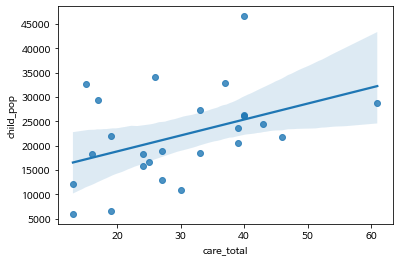

In [23]:
sns.regplot(x='care_total', y='child_pop', data=df_facilities)

# 최종 결과
- 병원 상관계수: 0.573
- 돌봄센터 상관계수: 0.422

In [28]:
df_facilities.to_csv('/content/drive/MyDrive/Colab Notebooks/1차프로젝트/make_df/df_facilities.csv',index=False)

In [24]:
df_facilities.corr()

,child_pop,h_total,care_total
child_pop,1.000000,0.573376,0.421900
h_total,0.573376,1.000000,-0.141612
care_total,0.421900,-0.141612,1.000000


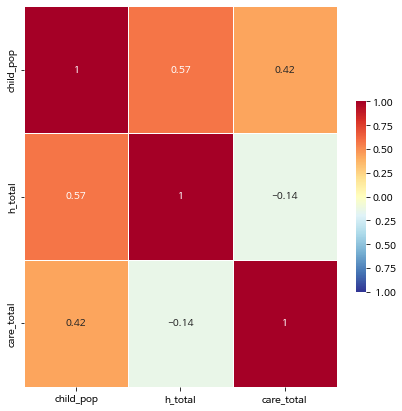

In [27]:
fig, ax = plt.subplots( figsize=(7,7))

sns.heatmap(df_facilities.corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=1,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 상관계수의 검정

In [ ]:
X= df_facilities.iloc[:,1:]
y= df_facilities.iloc[:,0]

import scipy.stats as st

for i in X.columns:
    print('\n',i)
    x = X[i].values
    print('P-values: ',st.pearsonr(x,y)[1])


 h_total
P-values:  0.002732575653647148

 care_total
P-values:  0.03566589863186744


## R2 검사

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

X = df_child.iloc[:,1:]
y = df_child.iloc[:,0]

X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

preds = lr.predict(X_test)

print(f'R2: {r2_score(y_test,preds):.3f}')

R2: 0.518
